In [157]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
plt.style.use('ggplot')

AFTER NUMEROUS ERRORS , I REALIZED THAT THE Y IN THE DATE SHOULD BE CAPITALIZED

In [158]:
pd.set_option('display.max_rows', 85)
pd.set_option('display.max_columns', 85)

In [159]:
td_date = lambda x: pd.datetime.strptime(x, '%m/%d/%Y')
pb = pd.read_csv(r'purchase_behaviour.csv')
td = pd.read_csv(r'transaction_data.csv', parse_dates=['DATE'], date_parser=td_date)

C:\Users\Fortune\AppData\Local\Temp\ipykernel_2400\212081143.py:1: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  td_date = lambda x: pd.datetime.strptime(x, '%m/%d/%Y')


PLEASE NOTE THAT THE DATE FORMAT HAS ALREADY BEEN CONVERTED IN EXCEL

In [160]:
td

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES
0,2018-10-17,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.0
1,2019-05-14,1,1307,348,66,CCs Nacho Cheese 175g,3,6.3
2,2019-05-20,1,1343,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.9
3,2018-08-17,2,2373,974,69,Smiths Chip Thinly S/Cream&Onion 175g,5,15.0
4,2018-08-18,2,2426,1038,108,Kettle Tortilla ChpsHny&Jlpno Chili 150g,3,13.8
...,...,...,...,...,...,...,...,...
264831,2019-03-09,272,272319,270088,89,Kettle Sweet Chilli And Sour Cream 175g,2,10.8
264832,2018-08-13,272,272358,270154,74,Tostitos Splash Of Lime 175g,1,4.4
264833,2018-11-06,272,272379,270187,51,Doritos Mexicana 170g,2,8.8
264834,2018-12-27,272,272379,270188,42,Doritos Corn Chip Mexican Jalapeno 150g,2,7.8


THERE ARE NO MISSING VALUES IN THE TRANSACTION DATA

In [161]:
for col in td.columns:
    pct_missing = np.mean(td[col].isnull())
    print('{} --> {}'.format(col, round(pct_missing)))

DATE --> 0
STORE_NBR --> 0
LYLTY_CARD_NBR --> 0
TXN_ID --> 0
PROD_NBR --> 0
PROD_NAME --> 0
PROD_QTY --> 0
TOT_SALES --> 0


THERE ARE NO MISSING VALUES IN THE PURCHASE BEHAVIOUR DATA

In [162]:
    for col in pb.columns:
        pct_missing = np.mean(pb[col].isnull())
        print('{} --> {}'.format(col, round(pct_missing)))

LYLTY_CARD_NBR --> 0
LIFESTAGE --> 0
PREMIUM_CUSTOMER --> 0


In [163]:
td.dtypes

DATE              datetime64[ns]
STORE_NBR                  int64
LYLTY_CARD_NBR             int64
TXN_ID                     int64
PROD_NBR                   int64
PROD_NAME                 object
PROD_QTY                   int64
TOT_SALES                float64
dtype: object

In [164]:
pb.dtypes

LYLTY_CARD_NBR       int64
LIFESTAGE           object
PREMIUM_CUSTOMER    object
dtype: object

In [165]:
td['PROD_NAME'].describe()

count                                     264836
unique                                       114
top       Kettle Mozzarella   Basil & Pesto 175g
freq                                        3304
Name: PROD_NAME, dtype: object

I REALIZED THAT SOME PART OF THE PROD\_NAME IS MISPELT , CHP INSTEAD OF CHIPS

In [166]:
# filt1 = td['PROD_NAME'].str.contains('Chp', na=False)
# td = td.loc[filt1]
td['PROD_NAME'] = td['PROD_NAME'].str.replace('Chp','Chip')
td.head()

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES
0,2018-10-17,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.0
1,2019-05-14,1,1307,348,66,CCs Nacho Cheese 175g,3,6.3
2,2019-05-20,1,1343,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.9
3,2018-08-17,2,2373,974,69,Smiths Chip Thinly S/Cream&Onion 175g,5,15.0
4,2018-08-18,2,2426,1038,108,Kettle Tortilla ChipsHny&Jlpno Chili 150g,3,13.8


Let's remove correct mispellings in the data 

In [167]:
# filt2 = td['PROD_NAME'].str.contains('&', na=False)
# td = td.loc[filt2]
td['PROD_NAME'] = td['PROD_NAME'].str.replace('&',' and ')
td['PROD_NAME'] = td['PROD_NAME'].str.replace('  ',' ')
td['PROD_NAME'] = td['PROD_NAME'].str.replace('   ',' ')

WE NEED JUST THE CHIPS

In [168]:
filt = td['PROD_NAME'].str.contains('Chip', na=False)

In [169]:
chips = td.loc[filt]

In [170]:
chips.head()

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES
0,2018-10-17,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.0
2,2019-05-20,1,1343,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.9
3,2018-08-17,2,2373,974,69,Smiths Chip Thinly S/Cream and Onion 175g,5,15.0
4,2018-08-18,2,2426,1038,108,Kettle Tortilla ChipsHny and Jlpno Chili 150g,3,13.8
6,2019-05-16,4,4149,3333,16,Smiths Crinkle Chips Salt and Vinegar 330g,1,5.7


In [171]:
chips['PROD_NAME'].unique().shape

(37,)

In [172]:
chips['PROD_NAME'].unique()

array(['Natural Chip  Compny SeaSalt175g',
       'Smiths Crinkle Cut Chips Chicken 170g',
       'Smiths Chip Thinly S/Cream and Onion 175g',
       'Kettle Tortilla ChipsHny and Jlpno Chili 150g',
       'Smiths Crinkle Chips Salt and Vinegar 330g',
       'Doritos Corn Chip Mexican Jalapeno 150g',
       'Thins Chips Light and  Tangy 175g',
       'Doritos Corn Chip Southern Chicken 150g',
       'Smiths Chip Thinly Cut Original 175g',
       'Thins Chips   Originl saltd 175g',
       'Natural ChipCo Hony Soy Chckn175g',
       'Dorito Corn Chip Supreme 380g',
       'Thins Chips Seasonedchicken 175g',
       'Doritos Corn Chips Original 170g',
       'Cobs Popd Swt/Chlli and Sr/Cream Chips 110g',
       'Natural Chip Co Tmato Hrb and Spce 175g',
       'Smiths Crinkle Cut Chips Original 170g',
       'Cobs Popd Sea Salt Chips 110g',
       'Smiths Crinkle Cut Chips Chs and Onion170g',
       'French Fries Potato Chips 175g',
       'Doritos Corn Chips Cheese Supreme 170g',
       '

In [173]:
chips.sort_values(['PROD_QTY'], ascending=False)

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES
69762,2018-08-19,226,226000,226201,4,Dorito Corn Chip Supreme 380g,200,650.00
69763,2019-05-20,226,226000,226210,4,Dorito Corn Chip Supreme 380g,200,650.00
17077,2018-08-20,153,153161,152587,30,Doritos Corn Chips Cheese Supreme 170g,5,22.00
228570,2019-05-18,79,79169,77499,108,Kettle Tortilla ChipsHny and Jlpno Chili 150g,5,23.00
99458,2018-08-17,138,138085,141016,40,Thins Chips Seasonedchicken 175g,5,16.50
...,...,...,...,...,...,...,...,...
82501,2019-05-12,20,20443,17453,69,Smiths Chip Thinly S/Cream and Onion 175g,1,3.00
204161,2018-08-15,94,94162,93482,108,Kettle Tortilla ChipsHny and Jlpno Chili 150g,1,4.60
204155,2019-05-15,94,94132,93289,106,Natural ChipCo Hony Soy Chckn175g,1,3.00
22963,2019-05-29,195,195352,195255,110,WW Original Corn Chips 200g,1,1.90


In [174]:
chips['LYLTY_CARD_NBR'] = chips['LYLTY_CARD_NBR'].astype(float)

C:\Users\Fortune\AppData\Local\Temp\ipykernel_2400\4186162864.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  chips['LYLTY_CARD_NBR'] = chips['LYLTY_CARD_NBR'].astype(float)


In [175]:
pb.head()

,LYLTY_CARD_NBR,LIFESTAGE,PREMIUM_CUSTOMER
0,1000,YOUNG SINGLES/COUPLES,Premium
1,1002,YOUNG SINGLES/COUPLES,Mainstream
2,1003,YOUNG FAMILIES,Budget
3,1004,OLDER SINGLES/COUPLES,Mainstream
4,1005,MIDAGE SINGLES/COUPLES,Mainstream


In [176]:
Merged = pd.merge(chips, pb, how='inner',on = 'LYLTY_CARD_NBR')

In [177]:
Merged.sort_values(['PROD_QTY'], ascending=False)

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,LIFESTAGE,PREMIUM_CUSTOMER
23191,2019-05-20,226,226000.0,226210,4,Dorito Corn Chip Supreme 380g,200,650.0,OLDER FAMILIES,Premium
23190,2018-08-19,226,226000.0,226201,4,Dorito Corn Chip Supreme 380g,200,650.0,OLDER FAMILIES,Premium
67512,2018-08-15,223,223025.0,223075,8,Smiths Crinkle Cut Chips Original 170g,5,14.5,YOUNG FAMILIES,Mainstream
44644,2018-08-19,62,62015.0,57858,75,Cobs Popd Sea Salt Chips 110g,5,19.0,RETIREES,Budget
67247,2019-05-14,40,40129.0,36720,78,Thins Chips Salt and Vinegar 175g,5,16.5,YOUNG FAMILIES,Mainstream
...,...,...,...,...,...,...,...,...,...,...
78336,2019-04-15,268,268310.0,264746,22,Thins Chips Originl saltd 175g,1,3.3,YOUNG SINGLES/COUPLES,Budget
78337,2018-08-01,268,268311.0,264747,78,Thins Chips Salt and Vinegar 175g,1,3.3,YOUNG SINGLES/COUPLES,Budget
7623,2018-12-02,195,195044.0,194875,4,Dorito Corn Chip Supreme 380g,1,6.5,MIDAGE SINGLES/COUPLES,Premium
78339,2019-03-29,268,268358.0,264791,28,Thins Potato Chips Hot and Spicy 175g,1,3.3,YOUNG SINGLES/COUPLES,Budget


APPARENTLY WE HAVE AN OUTLIER , CUSTOMER WITH <span style="font-size: 12px; text-align: right;">LYLTY_CARD_NBR</span><span style="font-size: 12px; font-weight: 700; text-align: right;">=</span><span style="font-size: 12px;">226000.0 HAS TWO PURCHASES OF PROD_QTY = 200&nbsp; WHICH IS UP TO 4000 PERCENT LARGER THAN THE SECOND HIGHEST PRODUCE , SO WE HAVE TO EXCLUDE THIS CUSTOMER FOR THE REST OF OUR ANALYSIS TO AVOID SKEWED RESULT</span>

In [178]:
lyt_check = Merged['LYLTY_CARD_NBR'] == 226000.0
lyt_check = Merged.loc[lyt_check].head()
lyt_check.sort_values('PROD_QTY', ascending=False)

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,LIFESTAGE,PREMIUM_CUSTOMER
23190,2018-08-19,226,226000.0,226201,4,Dorito Corn Chip Supreme 380g,200,650.0,OLDER FAMILIES,Premium
23191,2019-05-20,226,226000.0,226210,4,Dorito Corn Chip Supreme 380g,200,650.0,OLDER FAMILIES,Premium


In [179]:
NewMerged = Merged['LYLTY_CARD_NBR'] != 226000.0
NewMerged = Merged.loc[NewMerged].copy()
NewMerged.sort_values(['PROD_NAME', 'PROD_QTY'], ascending=[True, False])

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,LIFESTAGE,PREMIUM_CUSTOMER
10787,2019-05-17,56,56063.0,50363,75,Cobs Popd Sea Salt Chips 110g,5,19.0,OLDER FAMILIES,Budget
39148,2018-08-16,238,238083.0,242207,75,Cobs Popd Sea Salt Chips 110g,5,19.0,OLDER SINGLES/COUPLES,Premium
44644,2018-08-19,62,62015.0,57858,75,Cobs Popd Sea Salt Chips 110g,5,19.0,RETIREES,Budget
50217,2018-08-14,268,268095.0,264505,75,Cobs Popd Sea Salt Chips 110g,5,19.0,RETIREES,Mainstream
75407,2019-05-16,103,103333.0,103467,75,Cobs Popd Sea Salt Chips 110g,5,19.0,YOUNG SINGLES/COUPLES,Budget
...,...,...,...,...,...,...,...,...,...,...
86429,2019-06-17,151,151141.0,149852,27,WW Supreme Cheese Corn Chips 200g,1,1.9,YOUNG SINGLES/COUPLES,Premium
86514,2018-11-07,167,167092.0,168889,27,WW Supreme Cheese Corn Chips 200g,1,1.9,YOUNG SINGLES/COUPLES,Premium
86685,2019-03-26,186,186273.0,188668,27,WW Supreme Cheese Corn Chips 200g,1,1.9,YOUNG SINGLES/COUPLES,Premium
86705,2018-09-24,189,189122.0,189964,27,WW Supreme Cheese Corn Chips 200g,1,1.9,YOUNG SINGLES/COUPLES,Premium


In [180]:
# from google.colab import files

# NewMerged.to_csv('/content/NewMerged.csv', encoding = 'utf-8-sig') 
# files.download('NewMerged.csv')

In [181]:
NewMerged['PROD_NAME'].value_counts()

Kettle Tortilla ChipsHny and Jlpno Chili 150g    3296
Cobs Popd Swt/Chlli and Sr/Cream Chips 110g      3269
Cobs Popd Sea Salt Chips 110g                    3265
Smiths Crnkle Chip Orgnl Big Bag 380g            3233
Thins Potato Chips Hot and Spicy 175g            3229
Doritos Corn Chips Cheese Supreme 170g           3217
Doritos Corn Chip Mexican Jalapeno 150g          3204
Smiths Crinkle Chips Salt and Vinegar 330g       3197
Thins Chips Light and  Tangy 175g                3188
Dorito Corn Chip Supreme 380g                    3183
Doritos Corn Chip Southern Chicken 150g          3172
Doritos Corn Chips Nacho Cheese 170g             3160
Cobs Popd Sour Crm  and Chives Chips 110g        3159
Kettle Tortilla ChipsBtroot and Ricotta 150g     3146
Tostitos Smoked Chipotle 175g                    3145
Kettle Tortilla ChipsFeta and Garlic 150g        3138
Doritos Corn Chips Original 170g                 3121
Thins Chips Seasonedchicken 175g                 3114
Thins Chips Salt and  Vinega

1. TOP 5 MOST SOLD PRODUCTS

In [182]:
NewMerged.head()

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,LIFESTAGE,PREMIUM_CUSTOMER
0,2018-10-17,1,1000.0,1,5,Natural Chip Compny SeaSalt175g,2,6.0,YOUNG SINGLES/COUPLES,Premium
1,2019-05-20,1,1343.0,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.9,MIDAGE SINGLES/COUPLES,Budget
2,2018-08-17,2,2373.0,974,69,Smiths Chip Thinly S/Cream and Onion 175g,5,15.0,MIDAGE SINGLES/COUPLES,Budget
3,2018-08-18,2,2426.0,1038,108,Kettle Tortilla ChipsHny and Jlpno Chili 150g,3,13.8,MIDAGE SINGLES/COUPLES,Budget
4,2019-05-16,4,4149.0,3333,16,Smiths Crinkle Chips Salt and Vinegar 330g,1,5.7,MIDAGE SINGLES/COUPLES,Budget


In [183]:
NewMerged1 = NewMerged.copy()

In [184]:
NewMerged1['TOP'] =  NewMerged1.groupby('PROD_NAME').TOT_SALES.transform(np.sum)

In [185]:
NewMerged1.head()

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,LIFESTAGE,PREMIUM_CUSTOMER,TOP
0,2018-10-17,1,1000.0,1,5,Natural Chip Compny SeaSalt175g,2,6.0,YOUNG SINGLES/COUPLES,Premium,8331.0
1,2019-05-20,1,1343.0,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.9,MIDAGE SINGLES/COUPLES,Budget,8183.8
2,2018-08-17,2,2373.0,974,69,Smiths Chip Thinly S/Cream and Onion 175g,5,15.0,MIDAGE SINGLES/COUPLES,Budget,8313.0
3,2018-08-18,2,2426.0,1038,108,Kettle Tortilla ChipsHny and Jlpno Chili 150g,3,13.8,MIDAGE SINGLES/COUPLES,Budget,29021.4
4,2019-05-16,4,4149.0,3333,16,Smiths Crinkle Chips Salt and Vinegar 330g,1,5.7,MIDAGE SINGLES/COUPLES,Budget,34804.2


1. MOST PROFITABLE CHIPS

In [186]:
TopProd = NewMerged1.copy()

In [187]:
TopProd = TopProd.drop_duplicates('PROD_NAME')

In [188]:
TopProd.head()

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,LIFESTAGE,PREMIUM_CUSTOMER,TOP
0,2018-10-17,1,1000.0,1,5,Natural Chip Compny SeaSalt175g,2,6.0,YOUNG SINGLES/COUPLES,Premium,8331.0
1,2019-05-20,1,1343.0,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.9,MIDAGE SINGLES/COUPLES,Budget,8183.8
2,2018-08-17,2,2373.0,974,69,Smiths Chip Thinly S/Cream and Onion 175g,5,15.0,MIDAGE SINGLES/COUPLES,Budget,8313.0
3,2018-08-18,2,2426.0,1038,108,Kettle Tortilla ChipsHny and Jlpno Chili 150g,3,13.8,MIDAGE SINGLES/COUPLES,Budget,29021.4
4,2019-05-16,4,4149.0,3333,16,Smiths Crinkle Chips Salt and Vinegar 330g,1,5.7,MIDAGE SINGLES/COUPLES,Budget,34804.2


In [189]:
TopProd =TopProd.drop(['DATE'	,'STORE_NBR',	'LYLTY_CARD_NBR','TXN_ID'	,'PROD_NBR', 'PROD_QTY','TOT_SALES',	'LIFESTAGE',	'PREMIUM_CUSTOMER'], axis=1)

In [190]:
Top5 = TopProd.sort_values('TOP', ascending=False).head(5).copy()

In [191]:
Top5 = Top5.reset_index()
Top5 = Top5.drop(['index'], axis=1)

In [192]:
Top5.sort_values('TOP', ascending=False)

,PROD_NAME,TOP
0,Dorito Corn Chip Supreme 380g,39052.0
1,Smiths Crnkle Chip Orgnl Big Bag 380g,36367.6
2,Smiths Crinkle Chips Salt and Vinegar 330g,34804.2
3,Kettle Tortilla ChipsHny and Jlpno Chili 150g,29021.4
4,Kettle Tortilla ChipsBtroot and Ricotta 150g,27770.2


DORITO CORN CHIP SUPREME 380G HAS THE MOST SALE FOR THE CHIPS CATEGORY 

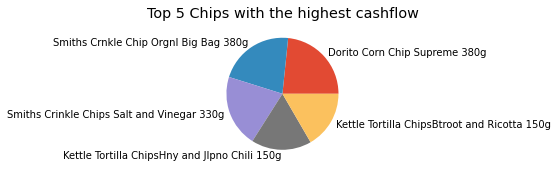

In [193]:
plt.style.use('ggplot')
mylabels = ['Dorito Corn Chip Supreme 380g','Smiths Crnkle Chip Orgnl Big Bag 380g', 'Smiths Crinkle Chips Salt and Vinegar 330g',
          'Kettle Tortilla ChipsHny and Jlpno Chili 150g', 'Kettle Tortilla ChipsBtroot and Ricotta 150g']
plt.pie( Top5['TOP'], labels = mylabels)
plt.title('Top 5 Chips with the highest cashflow')
plt.tight_layout()

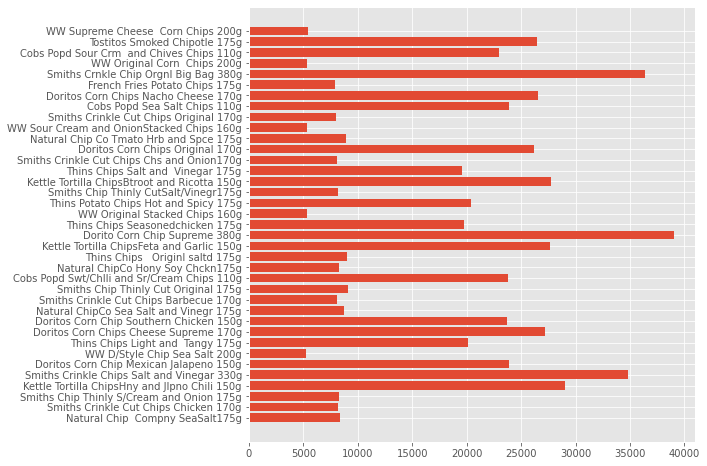

<BarContainer object of 37 artists>

In [194]:
plt.figure(figsize=(8, 8))
plt.barh(TopProd['PROD_NAME'], TopProd['TOP'])

2. MOST SOLD CHIPS

In [195]:
MostSold = NewMerged.copy()

In [196]:
MostSold['SoldFreq'] = MostSold.groupby('PROD_NAME').PROD_QTY.transform(np.sum)

In [197]:
MostSold = MostSold.drop_duplicates('PROD_NAME')

In [198]:
MostSold = MostSold.drop(['DATE'	,'STORE_NBR',	'LYLTY_CARD_NBR','TXN_ID'	,'PROD_NBR', 'PROD_QTY','TOT_SALES',	'LIFESTAGE',	'PREMIUM_CUSTOMER'], axis=1)

In [199]:
MostSold = MostSold.reset_index()

In [200]:
MostSold.drop(['index'], axis=1, inplace=True)

In [201]:
MostSold.sort_values('SoldFreq', ascending=False).head(5)

,PROD_NAME,SoldFreq
3,Kettle Tortilla ChipsHny and Jlpno Chili 150g,6309
29,Cobs Popd Sea Salt Chips 110g,6277
13,Cobs Popd Swt/Chlli and Sr/Cream Chips 110g,6256
20,Thins Potato Chips Hot and Spicy 175g,6185
8,Doritos Corn Chips Cheese Supreme 170g,6180


Kettle Tortilla ChipsHny and Jlpno Chili 150g is the most sold chips 

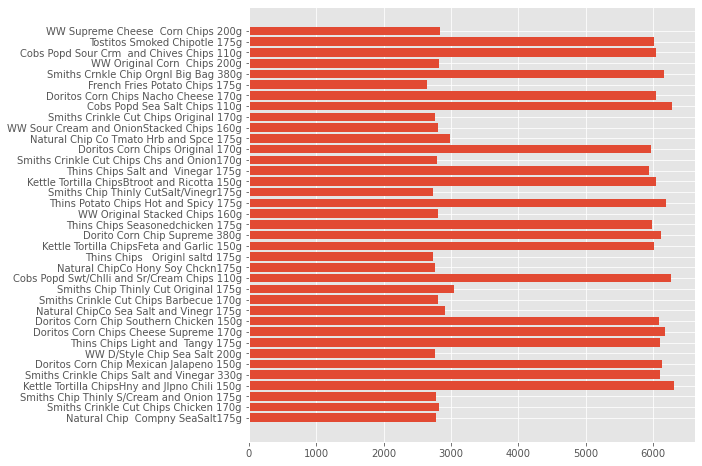

<BarContainer object of 37 artists>

In [202]:
plt.figure(figsize=(8, 8))
plt.barh(MostSold['PROD_NAME'], MostSold['SoldFreq'])

3\. AMOUNT MADE  WITH TIME

In [203]:
ChipTime = NewMerged.copy()

In [204]:
ChipTime['MONTH'] = pd.DatetimeIndex(ChipTime['DATE']).month

In [205]:
ChipTime['MONTH'] = ChipTime.MONTH.apply(lambda x: str(int(x)).zfill(2))

In [206]:
ChipTime['YEAR'] = pd.DatetimeIndex(ChipTime['DATE']).year 

In [207]:
ChipTime['MONTH'] = ChipTime['MONTH'].astype(str)
ChipTime['YEAR'] = ChipTime['YEAR'].astype(str)

In [208]:
# ChipTime['MONTH_YEAR'] = ChipTime[['YEAR', 'MONTH']].apply(lambda x: '/'.join(x), axis=1)
ChipTime['YEAR_MONTH'] = ChipTime['YEAR'] + '/' + ChipTime['MONTH']

In [209]:
ChipTime = ChipTime.sort_values('YEAR_MONTH')

WE WANT TO FIND THE TOTAL AMOUNT CHIPS MADE IN EACH MONTH

In [210]:
TimeAmount =ChipTime.copy()

In [211]:
TimeAmount.head(2)

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,LIFESTAGE,PREMIUM_CUSTOMER,MONTH,YEAR,YEAR_MONTH
48035,2018-07-23,180,180197.0,182272,106,Natural ChipCo Hony Soy Chckn175g,2,6.0,RETIREES,Budget,07,2018,2018/07
14719,2018-07-31,128,128005.0,130495,28,Thins Potato Chips Hot and Spicy 175g,2,6.6,OLDER FAMILIES,Budget,07,2018,2018/07


In [212]:
TimeAmount['AMOUNT_MADE'] = TimeAmount.groupby('YEAR_MONTH').TOT_SALES.transform(np.sum)

In [213]:
TimeAmount.head(2)

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,LIFESTAGE,PREMIUM_CUSTOMER,MONTH,YEAR,YEAR_MONTH,AMOUNT_MADE
48035,2018-07-23,180,180197.0,182272,106,Natural ChipCo Hony Soy Chckn175g,2,6.0,RETIREES,Budget,07,2018,2018/07,55401.4
14719,2018-07-31,128,128005.0,130495,28,Thins Potato Chips Hot and Spicy 175g,2,6.6,OLDER FAMILIES,Budget,07,2018,2018/07,55401.4


In [214]:
TimeAmount = TimeAmount.drop_duplicates('YEAR_MONTH')

In [215]:
TimeAmount.head(5)

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,LIFESTAGE,PREMIUM_CUSTOMER,MONTH,YEAR,YEAR_MONTH,AMOUNT_MADE
48035,2018-07-23,180,180197.0,182272,106,Natural ChipCo Hony Soy Chckn175g,2,6.0,RETIREES,Budget,07,2018,2018/07,55401.40
10779,2018-08-20,55,55009.0,48501,69,Smiths Chip Thinly S/Cream and Onion 175g,1,3.0,OLDER FAMILIES,Budget,08,2018,2018/08,51490.95
63577,2018-09-29,102,102242.0,103000,90,Tostitos Smoked Chipotle 175g,2,8.8,YOUNG FAMILIES,Budget,09,2018,2018/09,52184.10
11404,2018-10-28,247,247036.0,248808,61,Smiths Crinkle Cut Chips Chicken 170g,2,5.8,OLDER FAMILIES,Budget,10,2018,2018/10,54439.00
41501,2018-11-19,114,114236.0,118395,60,Kettle Tortilla ChipsFeta and Garlic 150g,2,9.2,OLDER SINGLES/COUPLES,Premium,11,2018,2018/11,52642.10


In [216]:
TimeAmount['AMOUNT_MADE'] = TimeAmount['AMOUNT_MADE'].astype(int)

In [217]:
TimeAmount = TimeAmount.drop(['DATE','STORE_NBR','LYLTY_CARD_NBR','TXN_ID','PROD_NBR','PROD_NAME','PROD_QTY','TOT_SALES','LIFESTAGE','PREMIUM_CUSTOMER', 'MONTH','YEAR'], axis=1)

In [218]:
TimeAmount.head(3)

,YEAR_MONTH,AMOUNT_MADE
48035,2018/07,55401
10779,2018/08,51490
63577,2018/09,52184


In [219]:
TimeAmount = TimeAmount.reset_index()

In [220]:
TimeAmount = TimeAmount.drop(['index'], axis=1)

In [221]:
TimeAmount.sort_values('YEAR_MONTH')

,YEAR_MONTH,AMOUNT_MADE
0,2018/07,55401
1,2018/08,51490
2,2018/09,52184
3,2018/10,54439
4,2018/11,52642
5,2018/12,55131
6,2019/01,53857
7,2019/02,49056
8,2019/03,54635
9,2019/04,51942


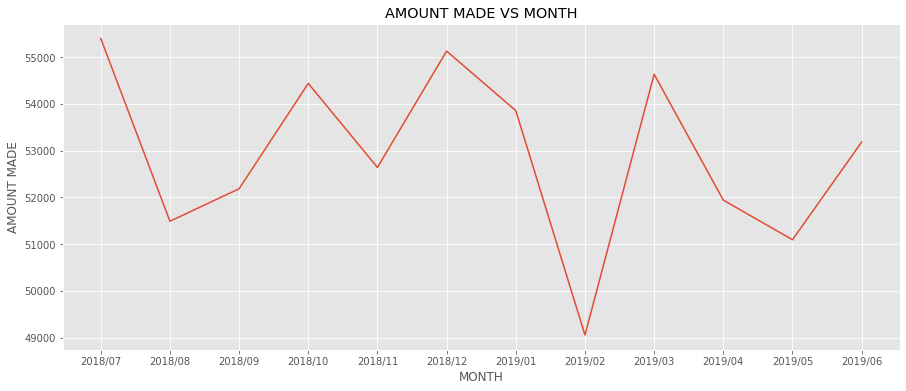

In [222]:
plt.figure(figsize=(15,6))
plt.xlabel('MONTH')
plt.ylabel('AMOUNT MADE')
plt.title('AMOUNT MADE VS MONTH')
plt.plot(TimeAmount['YEAR_MONTH'], TimeAmount['AMOUNT_MADE'])

4\. CHIPS SOLD WITH TIME

In [223]:
sp = ChipTime.copy()

In [224]:
sp['TOTAL_SOLD'] = sp.groupby('YEAR_MONTH').PROD_QTY.transform(np.sum)

In [225]:
sp = sp.drop_duplicates('YEAR_MONTH')

In [226]:
sp = sp.drop(['DATE','STORE_NBR','LYLTY_CARD_NBR','TXN_ID','PROD_NBR','PROD_NAME','PROD_QTY','TOT_SALES','LIFESTAGE','PREMIUM_CUSTOMER', 'MONTH','YEAR'], axis=1)

In [227]:
sp = sp.reset_index()

In [228]:
sp = sp.drop(['index'], axis=1)

In [229]:
sp

,YEAR_MONTH,TOTAL_SOLD
0,2018/07,14484
1,2018/08,13499
2,2018/09,13678
3,2018/10,14254
4,2018/11,13782
5,2018/12,14481
6,2019/01,14047
7,2019/02,12771
8,2019/03,14342
9,2019/04,13678


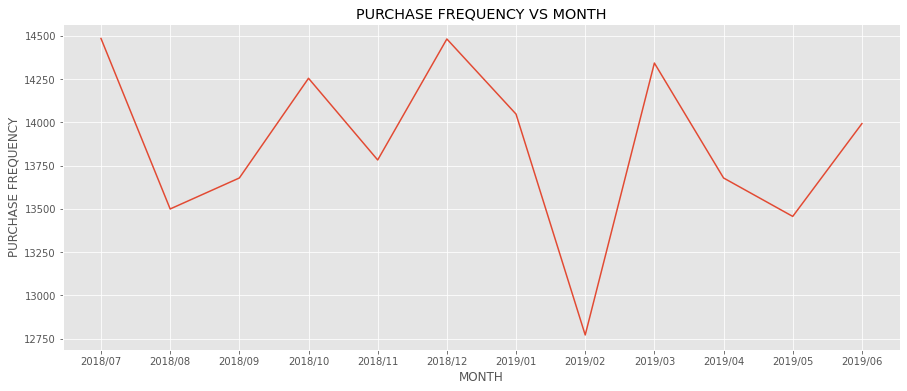

In [230]:
plt.figure(figsize=(15,6))
plt.xlabel('MONTH')
plt.ylabel('PURCHASE FREQUENCY')
plt.title('PURCHASE FREQUENCY VS MONTH')
plt.plot(sp['YEAR_MONTH'], sp['TOTAL_SOLD'])

5\. TOTAL SALES VS LIFESTAGE (WHO SPENDS THE MOST ON CHIPS?)

In [231]:
mp = NewMerged.copy()

In [232]:
mp['SUM_LIFESTAGE'] = mp.groupby('LIFESTAGE').TOT_SALES.transform(np.sum)

In [233]:
mp.drop_duplicates('LIFESTAGE', inplace=True)

In [234]:
mp = mp.drop(['DATE','STORE_NBR','LYLTY_CARD_NBR','TXN_ID','PROD_NBR','PROD_NAME','PROD_QTY','TOT_SALES','PREMIUM_CUSTOMER'], axis=1)

In [235]:
mp = mp.reset_index()

In [236]:
mp.drop(['index'], axis=1)

,LIFESTAGE,SUM_LIFESTAGE
0,YOUNG SINGLES/COUPLES,85776.20
1,MIDAGE SINGLES/COUPLES,61000.20
2,NEW FAMILIES,16457.55
3,OLDER FAMILIES,115369.60
4,OLDER SINGLES/COUPLES,132464.35
5,RETIREES,119553.70
6,YOUNG FAMILIES,104437.90


In [258]:
NewMerged['LIFESTAGE'].value_counts()

OLDER SINGLES/COUPLES     18043
RETIREES                  16363
OLDER FAMILIES            15894
YOUNG FAMILIES            14391
YOUNG SINGLES/COUPLES     12026
MIDAGE SINGLES/COUPLES     8335
NEW FAMILIES               2281
Name: LIFESTAGE, dtype: int64

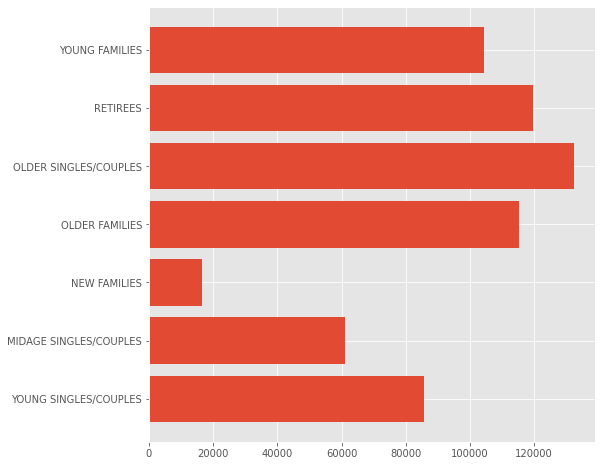

<BarContainer object of 7 artists>

In [238]:
plt.figure(figsize=(8, 8))
plt.barh(mp['LIFESTAGE'], mp['SUM_LIFESTAGE'])

|  |
| --- |
| OLDER SINGLES/COUPLES HAS SPENT THE MOST AMOUNT ON CHIPS<br> |

6\. PREMIUM CUSTOMERS VS TOTAL SALES(WHICH CATEGORY HAS SPENT TH EMOST AMOUNT OF MONEY ON CHIPS?)

In [239]:
lm = NewMerged.copy()

In [242]:
lm['SOLD_SEGMENT'] = lm.groupby('PREMIUM_CUSTOMER').TOT_SALES.transform(np.sum)

In [244]:
lm.drop_duplicates('PREMIUM_CUSTOMER', inplace=True)

In [246]:
lm = lm.drop(['DATE','STORE_NBR','LYLTY_CARD_NBR','TXN_ID','PROD_NBR','PROD_NAME','PROD_QTY','TOT_SALES','LIFESTAGE'], axis=1)

In [247]:
lm

,PREMIUM_CUSTOMER,SOLD_SEGMENT
0,Premium,165338.45
1,Budget,222228.55
1703,Mainstream,247492.50


In [248]:
lm = lm.reset_index()
lm = lm.drop(['index'], axis=1)

In [257]:
lm

,PREMIUM_CUSTOMER,SOLD_SEGMENT
0,Premium,165338.45
1,Budget,222228.55
2,Mainstream,247492.50


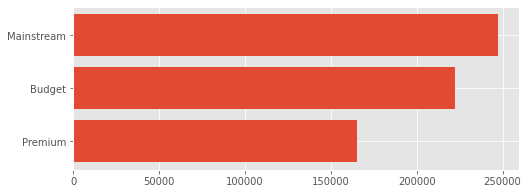

<BarContainer object of 3 artists>

In [254]:
plt.figure(figsize=(8, 3))
plt.barh(lm['PREMIUM_CUSTOMER'], lm['SOLD_SEGMENT'])

In [255]:
NewMerged['PREMIUM_CUSTOMER'].value_counts()

Mainstream    33671
Budget        30772
Premium       22890
Name: PREMIUM_CUSTOMER, dtype: int64

THE MAINSTREAM CUSTOMERS HAS BROUGHT MORE REVENUE , THIS MIGHT BE DUE TO THE FACT THAT THEY ARE MORE IN NUMBERS COMPARED TO THE OTHER TWO CUSTOMER SEGMENT

7\. AVERAGE CHIPS PRICE PER CUSTOMER SEGMENT(LIFESTAGE)

In [259]:
lmean = NewMerged.copy()

In [261]:
lmean['MEAN_LIFESTAGE'] = lmean.groupby('LIFESTAGE').TOT_SALES.transform(np.mean)

In [263]:
lmean.drop_duplicates('LIFESTAGE', inplace=True)

In [265]:
lmean = lmean.drop(['DATE','STORE_NBR','LYLTY_CARD_NBR','TXN_ID','PROD_NBR','PROD_NAME','PROD_QTY','TOT_SALES','PREMIUM_CUSTOMER'], axis=1)

In [269]:
lmean = lmean.reset_index()
lmean = lmean.drop(['index'], axis=1)

In [270]:
lmean

,LIFESTAGE,MEAN_LIFESTAGE
0,YOUNG SINGLES/COUPLES,7.132563
1,MIDAGE SINGLES/COUPLES,7.318560
2,NEW FAMILIES,7.215059
3,OLDER FAMILIES,7.258689
4,OLDER SINGLES/COUPLES,7.341592
5,RETIREES,7.306344
6,YOUNG FAMILIES,7.257168


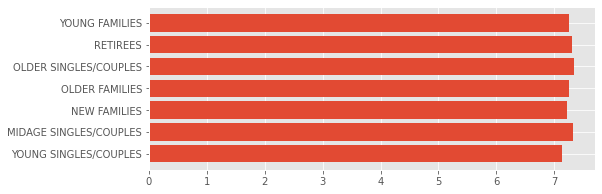

<BarContainer object of 7 artists>

In [271]:
plt.figure(figsize=(8, 3))
plt.barh(lmean['LIFESTAGE'], lmean['MEAN_LIFESTAGE'])

THE AVERAGE VALUE OF THE LIFESTAGES ARE QUITE SIMILAR TO EACH OTHER

8\. AVERAGE CHIPS PRICE PER CUSTOMER SEGMENT(PREMIUM\_CUSTOMER)

In [272]:
pmean = NewMerged.copy()

In [274]:
pmean['MEAN_CUSTOMER'] = pmean.groupby('PREMIUM_CUSTOMER').TOT_SALES.transform(np.mean)

In [277]:
pmean.drop_duplicates('PREMIUM_CUSTOMER', inplace=True)

In [278]:
pmean

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,LIFESTAGE,PREMIUM_CUSTOMER,MEAN_CUSTOMER
0,2018-10-17,1,1000.0,1,5,Natural Chip Compny SeaSalt175g,2,6.0,YOUNG SINGLES/COUPLES,Premium,7.223174
1,2019-05-20,1,1343.0,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.9,MIDAGE SINGLES/COUPLES,Budget,7.221778
1703,2019-05-18,3,3159.0,1759,77,Doritos Corn Chips Nacho Cheese 170g,2,8.8,MIDAGE SINGLES/COUPLES,Mainstream,7.350316


In [279]:
pmean = pmean.drop(['DATE','STORE_NBR','LYLTY_CARD_NBR','TXN_ID','PROD_NBR','PROD_NAME','PROD_QTY','TOT_SALES','LIFESTAGE'], axis=1)

In [281]:
pmean = pmean.reset_index()
pmean = pmean.drop(['index'], axis=1)

In [282]:
pmean

,PREMIUM_CUSTOMER,MEAN_CUSTOMER
0,Premium,7.223174
1,Budget,7.221778
2,Mainstream,7.350316


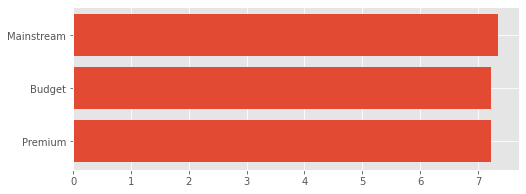

<BarContainer object of 3 artists>

In [283]:
plt.figure(figsize=(8, 3))
plt.barh(pmean['PREMIUM_CUSTOMER'], pmean['MEAN_CUSTOMER'])

THE AVERAGE TOTAL SALES OF PREMIUM CUSTOMERS ARE ASLO SIMILAR TO ONE ANOTHER